In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from pandas_profiling import ProfileReport as pr

In [2]:
df = pd.read_csv("Train.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [4]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Number_Weeks_Used          10.13
ID                          0.00
Estimated_Insects_Count     0.00
Crop_Type                   0.00
Soil_Type                   0.00
Pesticide_Use_Category      0.00
Number_Doses_Week           0.00
Number_Weeks_Quit           0.00
Season                      0.00
Crop_Damage                 0.00
dtype: float64

In [5]:
tt = pd.read_csv("Test.csv")
tt.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [7]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

Number_Weeks_Used          9.94
ID                         0.00
Estimated_Insects_Count    0.00
Crop_Type                  0.00
Soil_Type                  0.00
Pesticide_Use_Category     0.00
Number_Doses_Week          0.00
Number_Weeks_Quit          0.00
Season                     0.00
dtype: float64

In [8]:
ids = tt["ID"]
tt.drop(["ID"] , axis = 1 , inplace = True)
df.drop(["ID"] , axis = 1 , inplace = True)

In [9]:
pr(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.drop_duplicates(inplace = True)

In [12]:
df = pd.get_dummies(df , columns = ["Pesticide_Use_Category" , "Season"])
tt = pd.get_dummies(tt , columns = ["Pesticide_Use_Category" , "Season"])

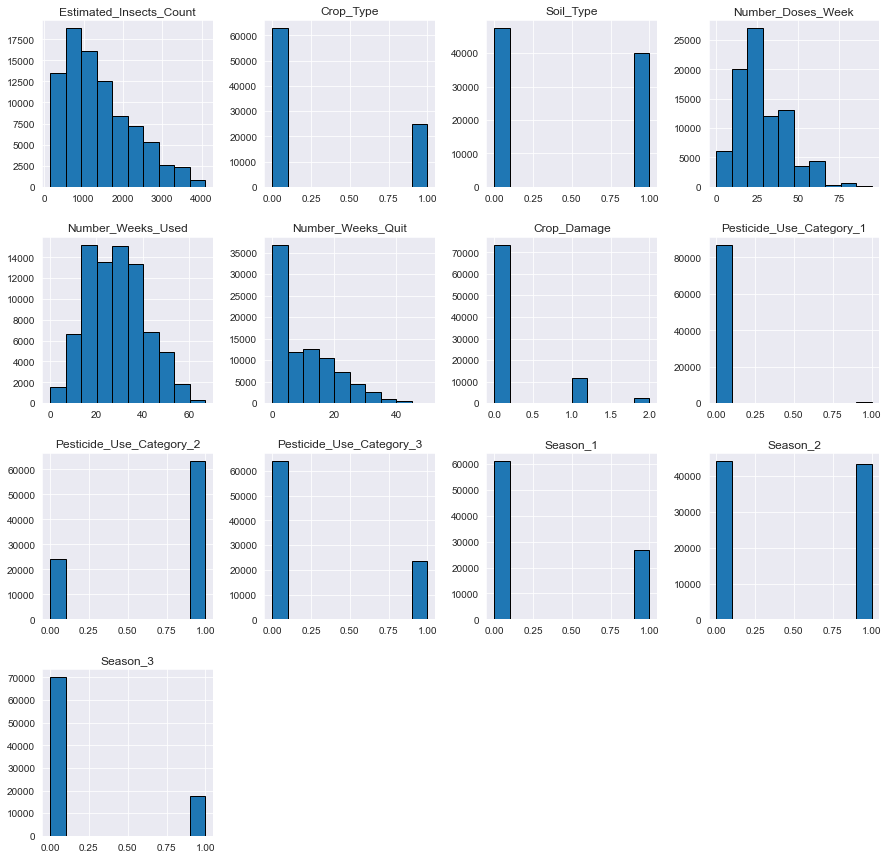

In [14]:
df.hist(edgecolor = "black" , figsize = (15 , 15));

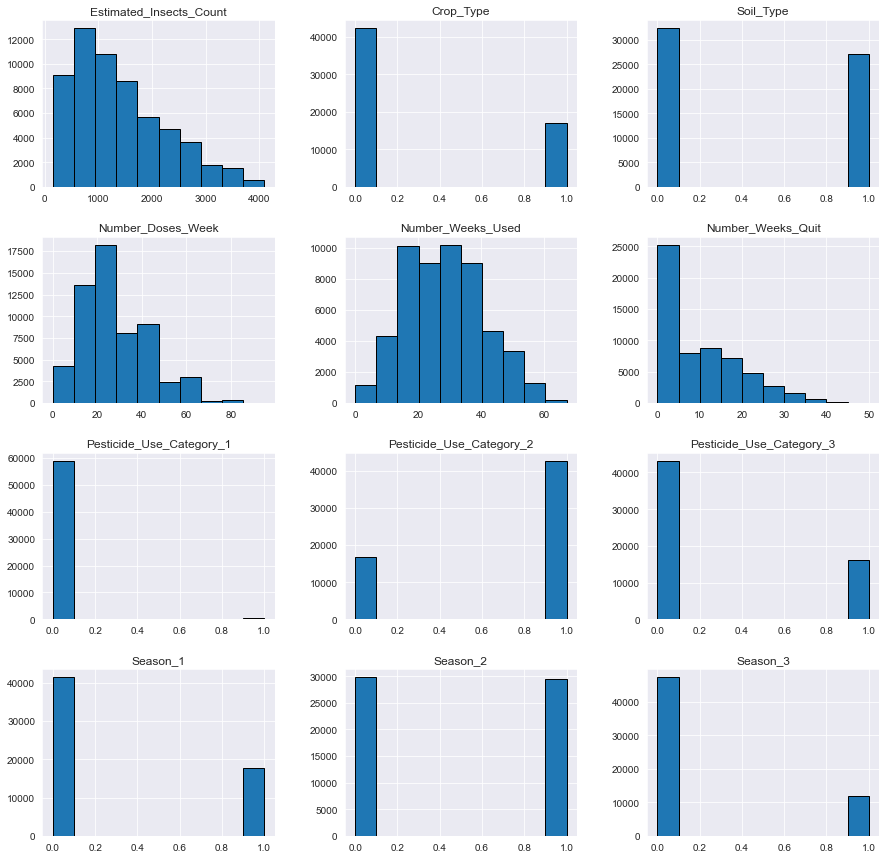

In [16]:
tt.hist(edgecolor = "black" , figsize = (15 , 15));

<AxesSubplot:>

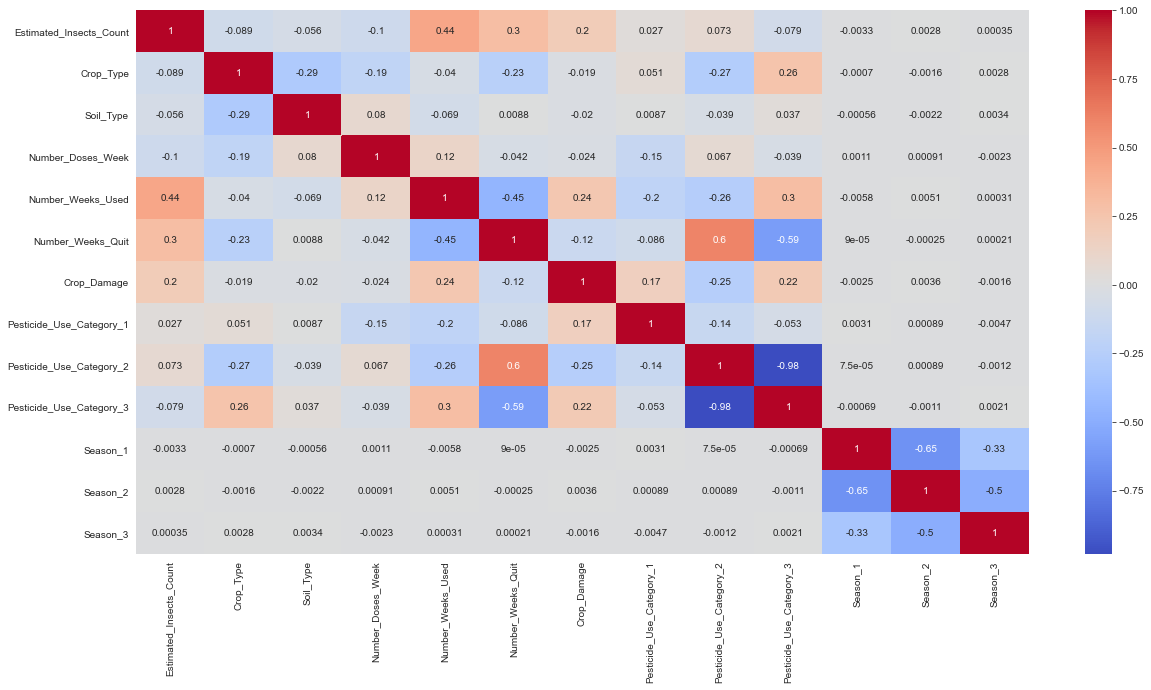

In [15]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [13]:
df.groupby("Estimated_Insects_Count")["Number_Weeks_Used"].mean()

Estimated_Insects_Count
150     15.729258
151     15.906977
168     16.039427
169     17.684211
188     16.756303
          ...    
3702    38.680357
3895    36.439189
3896    34.720000
4096    37.077982
4097    37.320000
Name: Number_Weeks_Used, Length: 71, dtype: float64

In [17]:
df.groupby("Number_Weeks_Used")["Estimated_Insects_Count"].mean()

Number_Weeks_Used
0.0     1645.958261
5.0     1230.991259
6.0      975.592992
7.0     1042.813397
8.0     1101.937388
           ...     
63.0    3427.224490
64.0    3379.159091
65.0    3491.645161
66.0    3444.705882
67.0    3634.875000
Name: Estimated_Insects_Count, Length: 64, dtype: float64

In [11]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [18]:
df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].median() , inplace = True)
tt["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].median() , inplace = True)

In [19]:
df.isna().sum()

Estimated_Insects_Count     0
Crop_Type                   0
Soil_Type                   0
Number_Doses_Week           0
Number_Weeks_Used           0
Number_Weeks_Quit           0
Crop_Damage                 0
Pesticide_Use_Category_1    0
Pesticide_Use_Category_2    0
Pesticide_Use_Category_3    0
Season_1                    0
Season_2                    0
Season_3                    0
dtype: int64

In [20]:
X = df.drop(["Crop_Damage"] , axis = 1)
y = df["Crop_Damage"]

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(70092, 17523, 70092, 17523)

In [22]:
y_train.value_counts()

0    58909
1     9378
2     1805
Name: Crop_Damage, dtype: int64

In [23]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,1,0,0,0.0,0,0,1,0,0,1,0,0
1,209,1,0,0,0.0,0,1,1,0,0,0,1,0
2,257,1,0,0,0.0,0,1,1,0,0,0,1,0
3,257,1,1,0,0.0,0,1,1,0,0,0,1,0
4,342,1,0,0,0.0,0,1,1,0,0,0,1,0


In [24]:
ints = ["Estimated_Insects_Count" , "Number_Doses_Week" , "Number_Weeks_Used" , "Number_Weeks_Quit"]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [26]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score

In [28]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = "multi:softprob" , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(n_estimators = 200 , random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "saga")))

In [39]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    f1 = 100 * (f1_score(y_test , preds , average = "weighted"))
    score = accuracy_score(y_test , preds)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (12 , 8))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"F1 Score : {f1}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(f1)
    sam.append(score)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



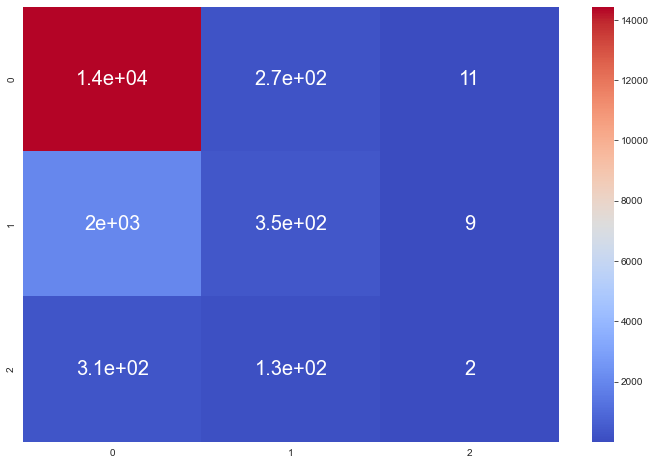



Training score : 0.8594


Test Score : 0.8437


K-fold accuracy : 0.8463


Standard Deviation of Accuracies in k-fold : 0.0015


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14708
           1       0.47      0.15      0.23      2368
           2       0.09      0.00      0.01       447

    accuracy                           0.84     17523
   macro avg       0.47      0.38      0.38     17523
weighted avg       0.79      0.84      0.80     17523



F1 Score : 80.08172096396619


Evaluation Score : 0.8436911487758946







CatBoostClassifier


Confusion matrix : 



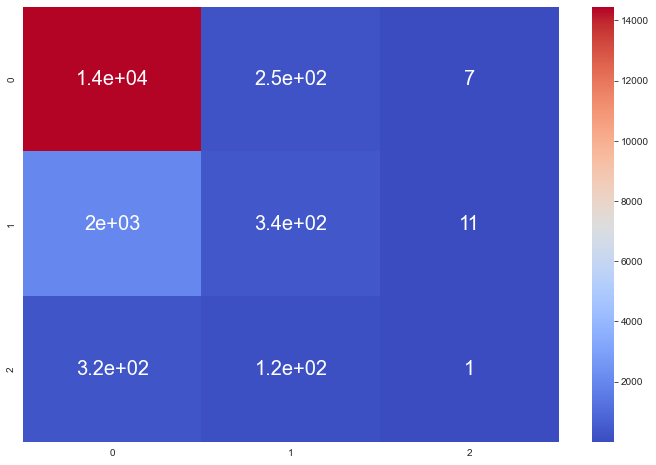



Training score : 0.8587


Test Score : 0.8441


K-fold accuracy : 0.8470


Standard Deviation of Accuracies in k-fold : 0.0020


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14708
           1       0.48      0.14      0.22      2368
           2       0.05      0.00      0.00       447

    accuracy                           0.84     17523
   macro avg       0.46      0.38      0.38     17523
weighted avg       0.79      0.84      0.80     17523



F1 Score : 80.02103672096916


Evaluation Score : 0.8440906237516407







RandomForest


Confusion matrix : 



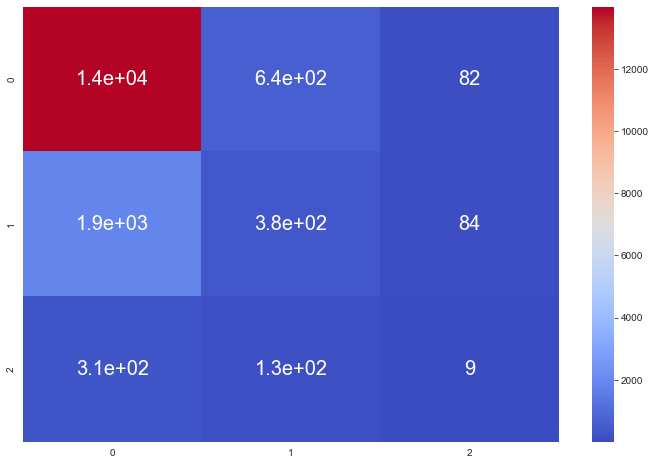



Training score : 0.9829


Test Score : 0.8206


K-fold accuracy : 0.8218


Standard Deviation of Accuracies in k-fold : 0.0006


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     14708
           1       0.33      0.16      0.22      2368
           2       0.05      0.02      0.03       447

    accuracy                           0.82     17523
   macro avg       0.42      0.38      0.38     17523
weighted avg       0.77      0.82      0.79     17523



F1 Score : 78.9794625819437


Evaluation Score : 0.8205786680362952







Extra Tree Classifier


Confusion matrix : 



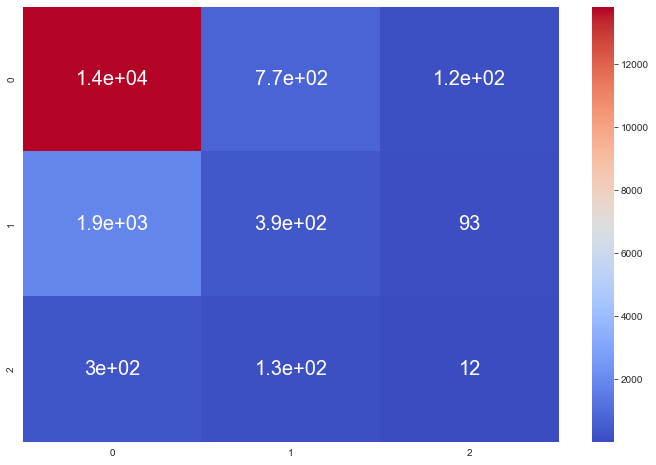



Training score : 0.9829


Test Score : 0.8110


K-fold accuracy : 0.8135


Standard Deviation of Accuracies in k-fold : 0.0014


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14708
           1       0.30      0.16      0.21      2368
           2       0.05      0.03      0.04       447

    accuracy                           0.81     17523
   macro avg       0.41      0.38      0.38     17523
weighted avg       0.77      0.81      0.78     17523



F1 Score : 78.43866699973064


Evaluation Score : 0.8109912686183872







Bagging Classifier


Confusion matrix : 



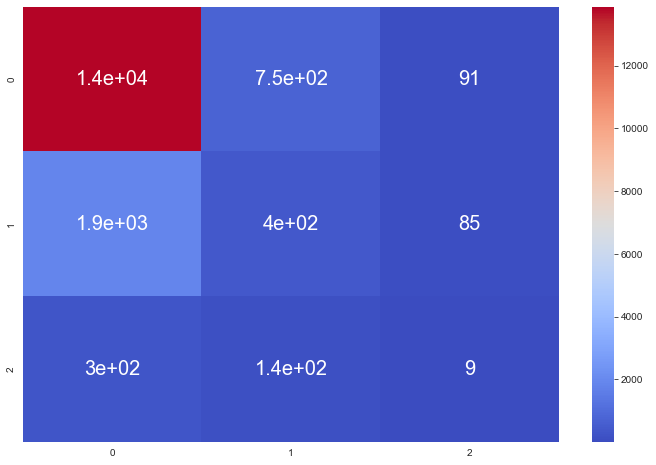



Training score : 0.9829


Test Score : 0.8150


K-fold accuracy : 0.8182


Standard Deviation of Accuracies in k-fold : 0.0006


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14708
           1       0.31      0.17      0.22      2368
           2       0.05      0.02      0.03       447

    accuracy                           0.81     17523
   macro avg       0.41      0.38      0.38     17523
weighted avg       0.77      0.81      0.79     17523



F1 Score : 78.74958052159622


Evaluation Score : 0.8149860183758488







Gradient Boosting Classifier


Confusion matrix : 



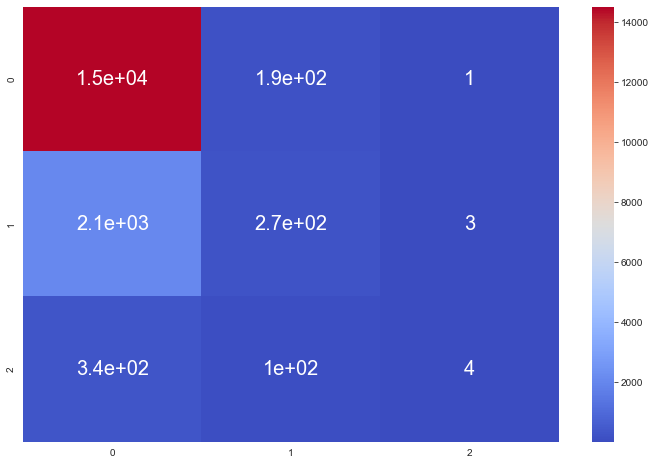



Training score : 0.8498


Test Score : 0.8443


K-fold accuracy : 0.8471


Standard Deviation of Accuracies in k-fold : 0.0013


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     14708
           1       0.48      0.12      0.19      2368
           2       0.50      0.01      0.02       447

    accuracy                           0.84     17523
   macro avg       0.61      0.37      0.37     17523
weighted avg       0.80      0.84      0.80     17523



F1 Score : 79.5457423526822


Evaluation Score : 0.8443188951663528







LightGBM


Confusion matrix : 



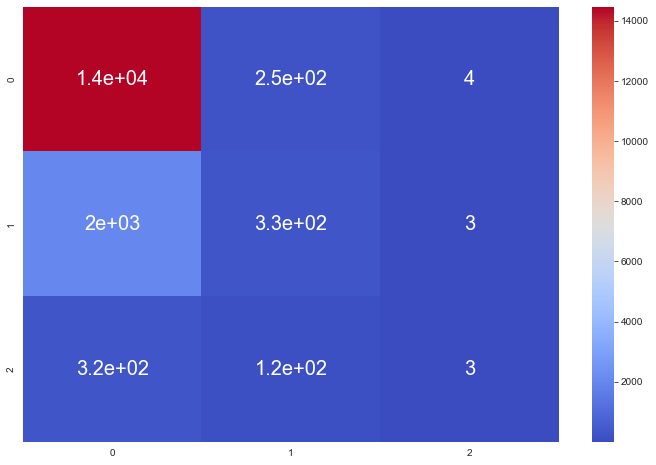



Training score : 0.8567


Test Score : 0.8440


K-fold accuracy : 0.8477


Standard Deviation of Accuracies in k-fold : 0.0021


Classification report : 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14708
           1       0.47      0.14      0.22      2368
           2       0.30      0.01      0.01       447

    accuracy                           0.84     17523
   macro avg       0.54      0.38      0.38     17523
weighted avg       0.79      0.84      0.80     17523



F1 Score : 79.95101398649282


Evaluation Score : 0.8439764880442846







Logistic Regression


Confusion matrix : 



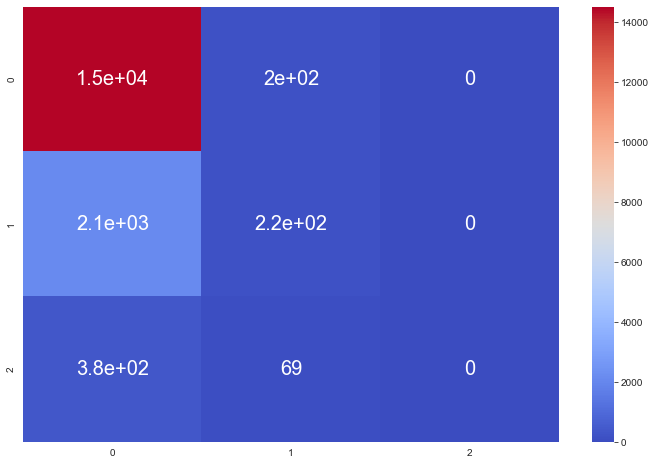



Training score : 0.8418


Test Score : 0.8404


K-fold accuracy : 0.8419


Standard Deviation of Accuracies in k-fold : 0.0010


Classification report : 

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     14708
           1       0.45      0.09      0.15      2368
           2       0.00      0.00      0.00       447

    accuracy                           0.84     17523
   macro avg       0.43      0.36      0.36     17523
weighted avg       0.78      0.84      0.79     17523



F1 Score : 78.79709205784849


Evaluation Score : 0.8404382811162472





Wall time: 23min 20s


In [40]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [41]:
data_pre_final = [x[0] for x in pre_final]

In [44]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [False , False , True , False , False , False])
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score,Evaluation_Score
0,Gradient Boosting Classifier,0.849755,0.844319,0.847101,0.001287,79.545742,0.844319
1,CatBoostClassifier,0.858671,0.844091,0.847001,0.002004,80.021037,0.844091
2,LightGBM,0.856731,0.843976,0.847700,0.002055,79.951014,0.843976
3,XGBClassifier,0.859371,0.843691,0.846274,0.001457,80.081721,0.843691
4,Logistic Regression,0.841794,0.840438,0.841879,0.001048,78.797092,0.840438
5,RandomForest,0.982865,0.820579,0.821820,0.000615,78.979463,0.820579
6,Bagging Classifier,0.982865,0.814986,0.818182,0.000552,78.749581,0.814986
7,Extra Tree Classifier,0.982865,0.810991,0.813488,0.001438,78.438667,0.810991


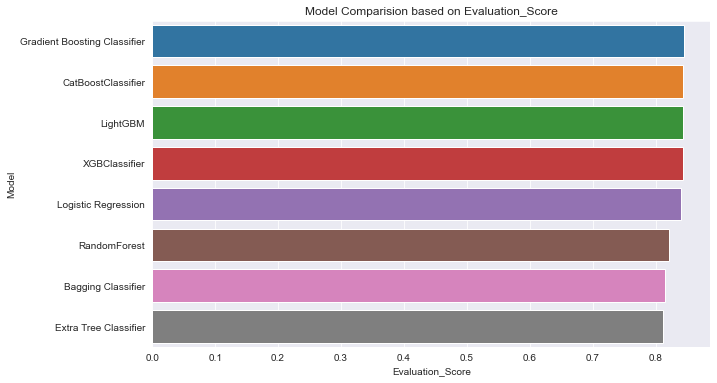

In [45]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "Evaluation_Score" , data = me)
plt.title("Model Comparision based on Evaluation_Score");

In [46]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 15))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

In [49]:
grad = pre_final[5][1]
grad

GradientBoostingClassifier(n_estimators=200, random_state=42)

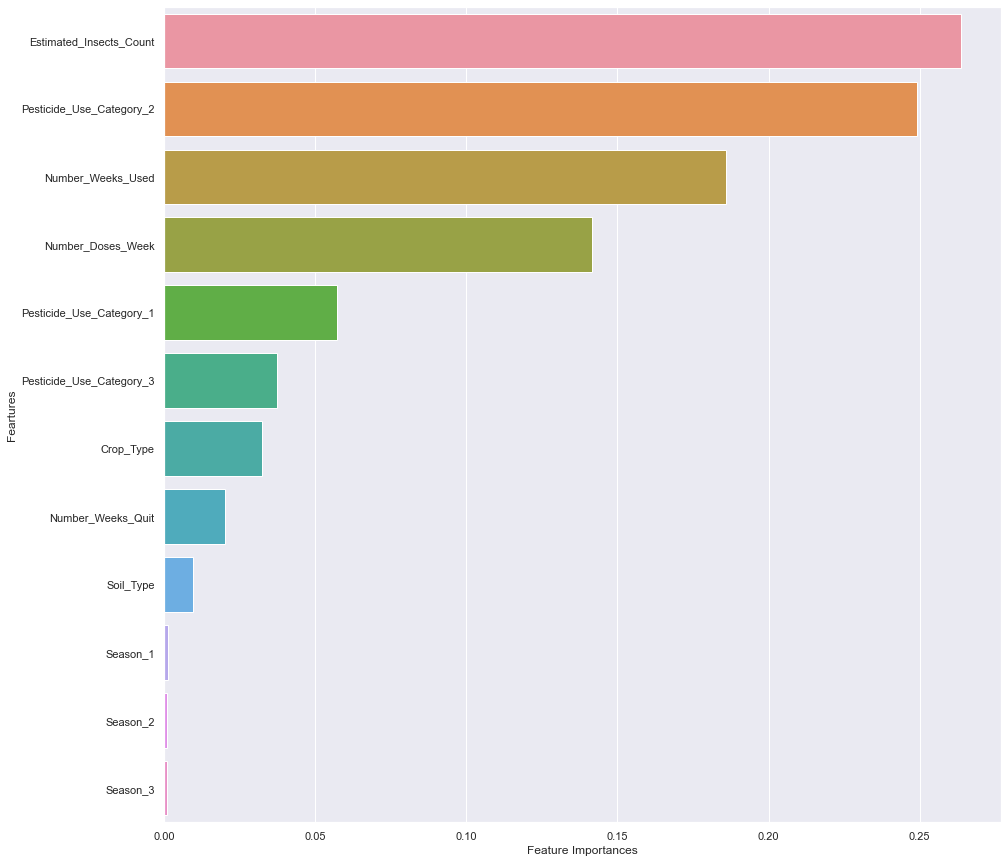

In [50]:
grad_df = feature_importance(grad , X_train , y_train)

In [51]:
final = pd.DataFrame({"ID" : ids , "Crop_Damage" : grad.predict(tt)})
final

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


In [52]:
final.to_csv("Gradient_1.csv" , index = False)